In [1]:
import pandas as pd
autos = pd.read_csv('./autos.csv')

In [2]:
autos['make_encoded'] = autos.groupby('make')['price'].transform('mean')
autos[["make", "price", "make_encoded"]].head(10)

,make,price,make_encoded
0,alfa-romero,13495,15498.333333
1,alfa-romero,16500,15498.333333
2,alfa-romero,16500,15498.333333
3,audi,13950,17859.166667
4,audi,17450,17859.166667
5,audi,15250,17859.166667
6,audi,17710,17859.166667
7,audi,18920,17859.166667
8,audi,23875,17859.166667
9,bmw,16430,26118.750000


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
warnings.filterwarnings('ignore')


In [11]:
df = pd.read_csv('./movielens1m.csv')
df = df.astype(np.uint8, errors='ignore') # reduce memory footprint
print("Number of Unique Zipcodes: {}".format(df["Zipcode"].nunique()))

Number of Unique Zipcodes: 3439


In [12]:
df

,Movie ID,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Unknown,War,Western,(no genres listed),User ID,Age,Gender,Occupation,Zipcode,Rating
0,b'3107',1,0,0,0,0,0,0,1,0,...,0,0,0,0,b'130',35,1,18,b'50021',5
1,b'2114',0,0,0,0,0,0,0,1,0,...,0,0,0,0,b'3829',25,0,0,b'22307',4
2,b'256',0,0,0,0,1,0,0,0,0,...,0,0,0,0,b'1265',18,0,21,b'49321',1
3,b'1389',1,0,0,0,0,0,0,0,0,...,0,0,0,0,b'2896',18,1,14,b'60073',5
4,b'3635',1,0,0,0,0,0,0,0,0,...,0,0,0,0,b'5264',18,1,17,b'15217',4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,b'2290',0,0,0,0,1,0,0,1,0,...,0,0,0,0,b'4508',25,1,21,b'15701',4
1000205,b'2643',1,1,0,0,0,0,0,0,0,...,0,0,0,0,b'4167',25,1,21,b'22032',1
1000206,b'593',0,0,0,0,0,0,0,1,0,...,0,0,0,0,b'5799',25,1,3,b'80916',5
1000207,b'1693',0,0,0,0,0,0,0,1,0,...,0,0,0,0,b'3224',25,0,14,b'93428',3


In [13]:
X = df.copy()
y = X.pop('Rating')

X_encode = X.sample(frac=0.25)
y_encode = y[X_encode.index]
X_pretrain = X.drop(X_encode.index)
y_train = y[X_encode.index]

In [16]:

from category_encoders import MEstimateEncoder

encoder = MEstimateEncoder(cols=['Zipcode'], m=5.0)
encoder.fit(X_encode, y_encode)
X_train = encoder.transform(X_pretrain)

In [20]:
X_train

,Movie ID,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Thriller,Unknown,War,Western,(no genres listed),User ID,Age,Gender,Occupation,Zipcode
0,b'3107',1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'130',35,1,18,3.628002
1,b'2114',0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'3829',25,0,0,3.063836
2,b'256',0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,b'1265',18,0,21,3.411574
3,b'1389',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,b'2896',18,1,14,3.624194
4,b'3635',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,b'5264',18,1,17,3.952839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,b'2290',0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,b'4508',25,1,21,3.174308
1000205,b'2643',1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,b'4167',25,1,21,3.839124
1000206,b'593',0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,b'5799',25,1,3,3.851155
1000207,b'1693',0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'3224',25,0,14,3.830160


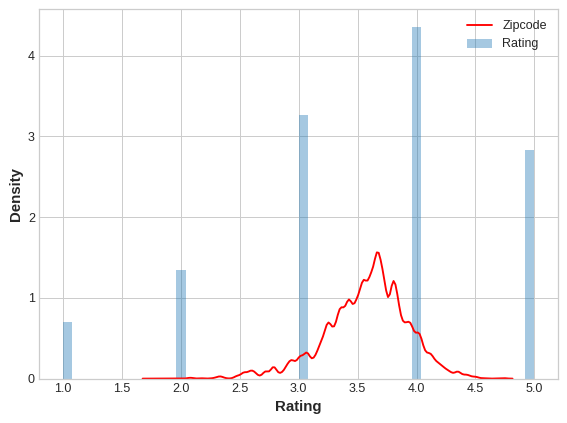

In [17]:
plt.figure(dpi=90)
ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.kdeplot(X_train.Zipcode, color='r', ax=ax)
ax.set_xlabel("Rating")
ax.legend(labels=['Zipcode', 'Rating']);

In [15]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [18]:
def score_dataset(X, y, model=XGBRegressor()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

In [19]:
df = pd.read_csv('./ames.csv')
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,SalePrice
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,5,2010,WD,Normal,215000
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,6,2010,WD,Normal,105000
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,Gar2,12500.0,6,2010,WD,Normal,172000
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,4,2010,WD,Normal,244000
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Split_or_Multilevel,Residential_Low_Density,37.0,7937.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,CulDSac,...,0.0,No_Pool,Good_Privacy,None,0.0,3,2006,WD,Normal,142500
2926,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0.0,8885.0,Pave,No_Alley_Access,Slightly_Irregular,Low,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,6,2006,WD,Normal,131000
2927,Split_Foyer,Residential_Low_Density,62.0,10441.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,Shed,700.0,7,2006,WD,Normal,132000
2928,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,77.0,10010.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,No_Fence,None,0.0,4,2006,WD,Normal,170000


In [22]:
df.select_dtypes(['object']).nunique()

MSSubClass       16
MSZoning          7
Street            2
Alley             3
LotShape          4
LandContour       4
Utilities         3
LotConfig         5
LandSlope         3
Neighborhood     28
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
OverallQual      10
OverallCond       9
RoofStyle         6
RoofMatl          8
Exterior1st      16
Exterior2nd      17
MasVnrType        5
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          6
BsmtCond          6
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        6
KitchenQual       5
Functional        8
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
PoolQC            5
Fence             5
MiscFeature       6
SaleType         10
SaleCondition     6
dtype: int64

In [23]:
df['SaleType'].value_counts()

WD       2536
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
VWD         1
Name: SaleType, dtype: int64

In [24]:
X_encode = df.sample(frac=0.2, random_state=0)
y_encode = X_encode.pop('SalePrice')

X_pretrain = df.drop(X_encode.index)
y_train = X_pretrain.pop('SalePrice')

In [25]:
encoder = MEstimateEncoder(cols=['Neighborhood', 'SaleType'], m=4.0)



encoder.fit(X_encode, y_encode)


X_train = encoder.transform(X_pretrain, y_train)

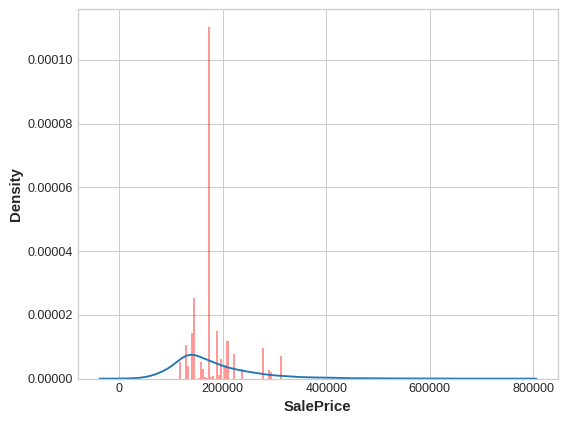

In [26]:
feature = encoder.cols

plt.figure(dpi=90)
ax = sns.distplot(y_train, kde=True, hist=False)
ax = sns.distplot(X_train[feature], color='r', ax=ax, hist=True, kde=False, norm_hist=True)
ax.set_xlabel("SalePrice");

In [27]:
X = df.copy()
y = X.pop("SalePrice")
score_base = score_dataset(X, y)
score_new = score_dataset(X_train, y_train)

print(f"Baseline Score: {score_base:.4f} RMSLE")
print(f"Score with Encoding: {score_new:.4f} RMSLE")

Baseline Score: 0.1428 RMSLE
Score with Encoding: 0.1416 RMSLE


In [28]:
m = 50

X = df.copy()
y = X.pop('SalePrice')

X["Count"] = range(len(X))
X["Count"][1] = 0  


encoder = MEstimateEncoder(cols="Count", m=m)
X = encoder.fit_transform(X, y)

score =  score_dataset(X, y)
print(f"Score: {score:.4f} RMSLE")

Score: 0.0303 RMSLE
